<a href="https://colab.research.google.com/github/bmt21409/bmt_pyson/blob/main/%EA%B8%B0%EC%B4%88_3_Pandas_%EA%B8%B0%EC%B4%88_10%EB%B6%84%EC%99%84%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

https://dataitgirls2.github.io/10minutes2pandas/



이 소개서는 주로 신규 사용자를 대상으로 한 판다스에 대한 간략한 소개로, 아래와 같이 구성되어 있습니다. 더 자세한 방법은 Cookbook에서 볼 수 있습니다.

1. Object Creation (객체 생성)
2. Viewing Data (데이터 확인하기)
3. Selection (선택)
4. Missing Data (결측치)
5. Operation (연산)
6. Merge (병합)
7. Grouping (그룹화)
8. Reshaping (변형)
9. Time Series (시계열)
10. Categoricals (범주화)
11. Plotting (그래프)
12. Getting Data In / Out (데이터 입 / 출력)
13. Gotchas (잡았다!)

In [ ]:
# 일반적으로 각 패키지는 별칭으로 pd, np, plt라는 이름으로 불림

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Object Creation (객체 생성)



- Pandas는 값을 가지고 있는 리스트를 통해 Series를 생성
- 정수로 만들어진 인덱스를 기본값으로 함

In [ ]:
# Pandas Series 객체 생성

import pandas as pd
import numpy as np

s = pd.Series([1, 3, 5, np.nan, 6, 8]) # Series 생성. 참고 np.nan : 결측값(NaN:Not a Number) => 연산 과정에서 잘못된 입력을 받았음을 나타내는 기호

print(type(s))
print(s)

<class 'pandas.core.series.Series'>
0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [ ]:
# datetime 인덱스와 레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여
# 데이터 프레임을 생성

import pandas as pd
import numpy as np

dates = pd.date_range('20201113', periods=6)

print(type(dates))
print(dates)

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) 
# pd.DataFrame([행과열의 들어갈 값들], 행 항목, 열 항목)

print(type(df))
print(df)
df

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2020-11-13', '2020-11-14', '2020-11-15', '2020-11-16',
               '2020-11-17', '2020-11-18'],
              dtype='datetime64[ns]', freq='D')
<class 'pandas.core.frame.DataFrame'>
                   A         B         C         D
2020-11-13  0.268523  0.356389 -1.523347  0.552270
2020-11-14 -0.630892  0.263820  1.495064 -0.032100
2020-11-15 -1.208034 -1.885922 -0.981330 -0.483862
2020-11-16 -0.476255  1.166172  1.955714 -0.729861
2020-11-17 -2.056026  0.047875 -1.099017  2.248116
2020-11-18 -0.590017 -1.467363  0.213626  0.191021


,A,B,C,D
2020-11-13,0.268523,0.356389,-1.523347,0.552270
2020-11-14,-0.630892,0.263820,1.495064,-0.032100
2020-11-15,-1.208034,-1.885922,-0.981330,-0.483862
2020-11-16,-0.476255,1.166172,1.955714,-0.729861
2020-11-17,-2.056026,0.047875,-1.099017,2.248116
2020-11-18,-0.590017,-1.467363,0.213626,0.191021


In [ ]:
# Series와 같은 것으로 변환될 수 있는 객체들의 dict로 구성된 
# 데이터 프레임을 생성

import pandas as pd
import numpy as np

df2 = pd.DataFrame(
    {
        'A': 1.,
        'B': pd.Timestamp('20201113'),
        'C': pd.Series(1, index=list(range(4)), dtype='float32'),
        'D': np.array([3] * 4, dtype='int32'),
        'E': pd.Categorical(["test", "train", "test", "train"]),
        'F': 'foo'
     }
)

print(type(df2))
print(df2)
df2

# dict 데이터 구조에서 Key 값은 열 항목으로, index 행 항목은 자동으로 0~3까지 정수로 부여됨. 
# dict 데이터 구조에서 Value 값은 데이터프레임의 값으로 됨.
print()
df2.dtypes

<class 'pandas.core.frame.DataFrame'>
     A          B    C  D      E    F
0  1.0 2020-11-13  1.0  3   test  foo
1  1.0 2020-11-13  1.0  3  train  foo
2  1.0 2020-11-13  1.0  3   test  foo
3  1.0 2020-11-13  1.0  3  train  foo



A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 2. Viewing Data (데이터 확인하기)

- 데이터프레임의 가장 윗 줄과 마지막 줄을 확인하고 싶을 때 사용.
- 데이터프레임.head() 함수 
- 데이터프레임.tail() 함수

In [ ]:
import pandas as pd
import numpy as np

dates = pd.date_range('20201113', periods=6)

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) 

print(df.tail(3)) # 끝에서 마지막 3줄을 불러옴
df.tail() # 끝에서 마지막 5줄을 불러옴

                   A         B         C         D
2020-11-16  1.003228  0.771687  2.336133 -0.223925
2020-11-17  0.129916 -1.724314  0.538916  1.484290
2020-11-18  0.021172 -0.782444 -1.483161  0.414338


,A,B,C,D
2020-11-14,-1.380241,-0.976657,0.309068,-0.621859
2020-11-15,-1.352981,-0.106456,-0.086486,-0.717491
2020-11-16,1.003228,0.771687,2.336133,-0.223925
2020-11-17,0.129916,-1.724314,0.538916,1.484290
2020-11-18,0.021172,-0.782444,-1.483161,0.414338


In [ ]:
import pandas as pd
import numpy as np

dates = pd.date_range('20201113', periods=6)

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) 

print(df.head(3)) # 처음부터 3줄을 불러옴
df.head() # 처음부터 5줄을 불러옴

                   A         B         C         D
2020-11-13  0.911708 -1.462781 -2.574687  1.012942
2020-11-14  1.174627 -0.063288  1.131090  0.386902
2020-11-15 -1.514504  0.439706 -2.316951 -0.044734


,A,B,C,D
2020-11-13,0.911708,-1.462781,-2.574687,1.012942
2020-11-14,1.174627,-0.063288,1.131090,0.386902
2020-11-15,-1.514504,0.439706,-2.316951,-0.044734
2020-11-16,1.411989,1.085219,-0.018230,1.065869
2020-11-17,-0.637639,2.093197,0.405150,-0.127914


In [ ]:
# 인덱스(index), 열(column), 그리고 값(numpy 데이터) 및 세부정보 보기

import pandas as pd
import numpy as np

dates = pd.date_range('20201113', periods=6)

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) 

print(df.index) # 인덱스 보기
print(df.columns) # 열(항목) 보기
print()
print(df.values) # 값 보기
print()
print(df.describe()) # 데이터의 대략적인 통계적 정보 요약
print()
print(df)
print()
print(df.T) # 데이터를 전치
print()
print(df.sort_index(axis=1, ascending=True)) # 축 별로 정렬 : False(오름차순), True(내림차순)-default
print(df.sort_index(axis=1, ascending=False))
print()
print(df.sort_values(by='B')) # 값 별로 정렬
df.sort_values(by='B')

DatetimeIndex(['2020-11-13', '2020-11-14', '2020-11-15', '2020-11-16',
               '2020-11-17', '2020-11-18'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')

[[-0.71435558 -1.02794348  0.04849866  0.39770856]
 [ 0.69870726 -0.84612964 -0.26452067 -0.91861936]
 [-1.42533206 -1.3830938  -0.42084878 -1.32913186]
 [ 0.54661564 -0.14140463 -0.05641197  0.60249799]
 [ 1.06719919 -0.03245234 -0.90841943  0.19756194]
 [ 1.99241113  0.29696158 -1.68509104 -1.03490525]]

              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.360874 -0.522344 -0.547799 -0.347481
std    1.237424  0.656921  0.650673  0.838717
min   -1.425332 -1.383094 -1.685091 -1.329132
25%   -0.399113 -0.982490 -0.786527 -1.005834
50%    0.622661 -0.493767 -0.342685 -0.360529
75%    0.975076 -0.059690 -0.108439  0.347672
max    1.992411  0.296962  0.048499  0.602498

                   A         B         C         D
2020-11-13 -0.7143

,A,B,C,D
2020-11-15,-1.425332,-1.383094,-0.420849,-1.329132
2020-11-13,-0.714356,-1.027943,0.048499,0.397709
2020-11-14,0.698707,-0.846130,-0.264521,-0.918619
2020-11-16,0.546616,-0.141405,-0.056412,0.602498
2020-11-17,1.067199,-0.032452,-0.908419,0.197562
2020-11-18,1.992411,0.296962,-1.685091,-1.034905


# 3. Selection (선택)

- 선택과 설정을 위한 Python/Numpy의 표준화된 표현들이 직관적이며 코드 작성을 위한 양방향 작업에 유용
- 하지만 Pandas에 최적화된 데이터 접근 방법 사용 : .at, .iat, .loc, .iloc 사용

In [ ]:
# Getting (데이터 얻기)

import pandas as pd
import numpy as np

dates = pd.date_range('20201113', periods=6)

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) 

print(df);print()
print(df['A']);print() # df.A와 동일한 Series를 생성하는 단일 열을 선택
print(df[0:3]);print() # 행을 분할하는 []를 통해 선택
print(df['20201114':'20201116']) 

                   A         B         C         D
2020-11-13 -1.918101 -0.575459 -0.297129  0.809044
2020-11-14 -0.304621  1.659247  2.287605 -0.648461
2020-11-15  0.985661  0.457760  1.396212  0.908758
2020-11-16  0.918592 -0.699243 -0.883105 -0.121630
2020-11-17 -0.167518  0.667178  0.954304  1.342123
2020-11-18 -0.401958 -0.122435  0.019574 -0.748325

2020-11-13   -1.918101
2020-11-14   -0.304621
2020-11-15    0.985661
2020-11-16    0.918592
2020-11-17   -0.167518
2020-11-18   -0.401958
Freq: D, Name: A, dtype: float64

                   A         B         C         D
2020-11-13 -1.918101 -0.575459 -0.297129  0.809044
2020-11-14 -0.304621  1.659247  2.287605 -0.648461
2020-11-15  0.985661  0.457760  1.396212  0.908758

                   A         B         C         D
2020-11-14 -0.304621  1.659247  2.287605 -0.648461
2020-11-15  0.985661  0.457760  1.396212  0.908758
2020-11-16  0.918592 -0.699243 -0.883105 -0.121630


In [ ]:
# Selection by Label (Label 을 통한 선택)

import pandas as pd
import numpy as np

dates = pd.date_range('20201113', periods=6)

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

print(df);print()

print(df.loc[dates[0]]) # 라벨을 사용하여 횡단면을 얻음
print(df.loc[dates[1]])
print(df.loc[dates[2]]);print()

# df.loc[행, 열]
print(df.loc[:,['A','B']]);print() # 라벨을 사용하여 여러 축(의 데이터)을 얻음.
print(df.loc['20201113':'20201115', ['A', 'C']]);print() # 양쪽 종단점을 포함한 라벨 슬라이싱.

print(df.loc['20201113',['A','B']]);print() # 반환되는 객체의 차원을 줄임.

print(df.loc[dates[0], 'A']) # 스칼라 값 얻음.
print(df.at[dates[0], 'A']) # 스칼라 값을 더 빠르게 얻음.

                   A         B         C         D
2020-11-13  1.322449 -0.478986 -0.671340  0.926817
2020-11-14 -0.297145  0.637463  0.451564  1.245853
2020-11-15  1.804914  1.135583 -0.791125 -0.486169
2020-11-16 -1.812098  0.377769 -1.847900 -1.042313
2020-11-17  1.614249  2.081424  0.081558  0.604965
2020-11-18  0.669463  0.175546  0.159076 -0.834814

A    1.322449
B   -0.478986
C   -0.671340
D    0.926817
Name: 2020-11-13 00:00:00, dtype: float64
A   -0.297145
B    0.637463
C    0.451564
D    1.245853
Name: 2020-11-14 00:00:00, dtype: float64
A    1.804914
B    1.135583
C   -0.791125
D   -0.486169
Name: 2020-11-15 00:00:00, dtype: float64

                   A         B
2020-11-13  1.322449 -0.478986
2020-11-14 -0.297145  0.637463
2020-11-15  1.804914  1.135583
2020-11-16 -1.812098  0.377769
2020-11-17  1.614249  2.081424
2020-11-18  0.669463  0.175546

                   A         C
2020-11-13  1.322449 -0.671340
2020-11-14 -0.297145  0.451564
2020-11-15  1.804914 -0.791125

A   

In [ ]:
# Selection by Position (위치로 선택하기)

import pandas as pd
import numpy as np

dates = pd.date_range('20201113', periods=6)

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

print(df);print()

print(df.iloc[3]);print() # 넘겨받은 정수의 위치를 기준으로 선택

print(df.iloc[3:5,0:2]);print() # 정수로 표기된 슬라이스들을 통해 numpy / python과 유사하게 작동

print(df.iloc[[1, 2, 4], [0, 2]]);print() # 정수로 표기된 위치값의 리스트들을 통해 numpy / python의 스타일과 유사하게 작동

print(df.iloc[1:3, :]);print() # 명시적으로 행을 나누고자 하는 경우
print(df.iloc[:, 1:3]);print() # 명시적으로 열을 나누고자 하는 경우

print(df.iloc[1,1]) # 명시적으로 특정한 값을 얻고자 하는 경우
print(df.iat[1,1]) # 스칼라 값을 빠르게 얻는 방법

                   A         B         C         D
2020-11-13  1.002932  0.478945  1.693087  0.072844
2020-11-14 -0.640450  2.271407 -0.035691  0.718035
2020-11-15 -0.019410 -0.042574 -0.101110  1.610325
2020-11-16  1.084601  0.379361  0.145308  0.986049
2020-11-17  0.538109 -0.629735  0.434703 -1.250632
2020-11-18 -0.681390 -1.402511  1.973230  1.690592

A    1.084601
B    0.379361
C    0.145308
D    0.986049
Name: 2020-11-16 00:00:00, dtype: float64

                   A         B
2020-11-16  1.084601  0.379361
2020-11-17  0.538109 -0.629735

                   A         C
2020-11-14 -0.640450 -0.035691
2020-11-15 -0.019410 -0.101110
2020-11-17  0.538109  0.434703

                  A         B         C         D
2020-11-14 -0.64045  2.271407 -0.035691  0.718035
2020-11-15 -0.01941 -0.042574 -0.101110  1.610325

                   B         C
2020-11-13  0.478945  1.693087
2020-11-14  2.271407 -0.035691
2020-11-15 -0.042574 -0.101110
2020-11-16  0.379361  0.145308
2020-11-17 -0.6297

In [ ]:
# Boolean Indexing

import pandas as pd
import numpy as np

dates = pd.date_range('20201113', periods=6)

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

print(df);print()

print(df[df.A > 0]);print() # 데이터를 선택하기 위해 단일 열의 값을 사용
print(df[df > 0]);print() # Boolean 조건을 충족하는 데이터프레임에서 값을 선택

# 필터링을 위한 메소드 isin() 사용
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
print(df2);print()
print(df2[df2['E'].isin(['two','four'])]);print() # E열에 two, four값이 있는 그 행(인덱스) 출력

                   A         B         C         D
2020-11-13  2.077711 -0.877848  0.591105  0.207376
2020-11-14 -0.747961  2.187228 -0.243862  0.087110
2020-11-15 -1.328781 -0.529971  0.332067 -0.663415
2020-11-16  0.230210  1.419166 -1.327556  0.045747
2020-11-17  2.666794  1.430901  0.186585 -0.711753
2020-11-18  0.668363 -0.613509 -1.326469 -0.465985

                   A         B         C         D
2020-11-13  2.077711 -0.877848  0.591105  0.207376
2020-11-16  0.230210  1.419166 -1.327556  0.045747
2020-11-17  2.666794  1.430901  0.186585 -0.711753
2020-11-18  0.668363 -0.613509 -1.326469 -0.465985

                   A         B         C         D
2020-11-13  2.077711       NaN  0.591105  0.207376
2020-11-14       NaN  2.187228       NaN  0.087110
2020-11-15       NaN       NaN  0.332067       NaN
2020-11-16  0.230210  1.419166       NaN  0.045747
2020-11-17  2.666794  1.430901  0.186585       NaN
2020-11-18  0.668363       NaN       NaN       NaN

                   A        

In [ ]:
# Setting (설정)

import pandas as pd
import numpy as np

dates = pd.date_range('20201113', periods=6)

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

print(df);print()

# 새 열을 설정하면 데이터가 인덱스 별로 자동 정렬
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20201113', periods=6))
print(s1);print()

df['F'] = s1
print(df);print()

df.at[dates[0],'A'] = 0 # 라벨에 의해 값을 설정
df.iat[0,1] = 0 # 위치에 의해 값을 설정 
df.loc[:,'D'] = np.array([5] * len(df)) # Numpy 배열을 사용한 할당에 의해 값을 설정 : D열에 5 대입
print(df);print()

# where 연산 설정
df2 = df
df2[df2>0] = -df2
print(df2)

                   A         B         C         D
2020-11-13  0.664468  0.415255  0.182158 -0.264939
2020-11-14 -0.899263  0.249944  0.077126 -1.016277
2020-11-15 -0.371782 -0.478328 -0.632047 -0.715229
2020-11-16 -0.606377 -0.836186 -0.954979  0.486165
2020-11-17  0.488716 -1.159999 -0.572096 -0.048152
2020-11-18 -0.480164 -1.124653 -2.402296  0.824492

2020-11-13    1
2020-11-14    2
2020-11-15    3
2020-11-16    4
2020-11-17    5
2020-11-18    6
Freq: D, dtype: int64

                   A         B         C         D  F
2020-11-13  0.664468  0.415255  0.182158 -0.264939  1
2020-11-14 -0.899263  0.249944  0.077126 -1.016277  2
2020-11-15 -0.371782 -0.478328 -0.632047 -0.715229  3
2020-11-16 -0.606377 -0.836186 -0.954979  0.486165  4
2020-11-17  0.488716 -1.159999 -0.572096 -0.048152  5
2020-11-18 -0.480164 -1.124653 -2.402296  0.824492  6

                   A         B         C  D  F
2020-11-13  0.000000  0.000000  0.182158  5  1
2020-11-14 -0.899263  0.249944  0.077126  5  2
202

# 4. Missing Data (결측치)

- Pandas는 결측치를 표현하기 위해 주로 np.nan 값을 사용
- np.nan은 기본 설정값이지만 계산에는 포함되지 않음
- Reindexing으로 지정된 축 상의인덱스를 변경/추가/삭제 가능
- Reindexing은 데이터의 복사본을 반환

In [ ]:
import pandas as pd
import numpy as np

dates = pd.date_range('20201113', periods=6)

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

print(df);print()

df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
print(df1);print()

print(df1.dropna(how='any')) # 결측치를 가지고 있는 행들을 제외하고 표시
print(df1.fillna(value=5)) # 결측치에 값을 채워넣음
print(pd.isna(df1)) # isna()함수 : NaN인 값에만 True가 표시되게 하는 함수
print(df1)

                   A         B         C         D
2020-11-13 -0.535112 -2.152301 -1.248211 -0.318263
2020-11-14 -0.245367 -0.308455 -0.119005  0.348416
2020-11-15  0.629707 -2.080417 -0.563429  0.491402
2020-11-16 -2.007965  0.365917  1.222220  0.850416
2020-11-17  0.358648 -0.416705 -0.866259  0.873454
2020-11-18  0.406428  0.785300 -0.215934  1.194589

                   A         B         C         D    E
2020-11-13 -0.535112 -2.152301 -1.248211 -0.318263  1.0
2020-11-14 -0.245367 -0.308455 -0.119005  0.348416  1.0
2020-11-15  0.629707 -2.080417 -0.563429  0.491402  NaN
2020-11-16 -2.007965  0.365917  1.222220  0.850416  NaN

                   A         B         C         D    E
2020-11-13 -0.535112 -2.152301 -1.248211 -0.318263  1.0
2020-11-14 -0.245367 -0.308455 -0.119005  0.348416  1.0
                   A         B         C         D    E
2020-11-13 -0.535112 -2.152301 -1.248211 -0.318263  1.0
2020-11-14 -0.245367 -0.308455 -0.119005  0.348416  1.0
2020-11-15  0.629707 -2.0

# 5. Operation (연산)

In [ ]:
# Stats (통계) : 일반적으로 결측치를 제외한 후 연산

import pandas as pd
import numpy as np

dates = pd.date_range('20201113', periods=6)

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

print(df);print()

print(df.mean());print() # 기술통계를 수행
print(df.mean(1));print() # 다른 축에서 동일한 연산을 수행

# Pandas는 지정된 차원을 따라 자동으로 브로드 캐스팅 됨.
# 정렬이 필요하며, 차원이 다른 객체 연산

s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
print(s);print()

print(df.sub(s, axis='index'))

                   A         B         C         D
2020-11-13 -1.843694 -1.096705 -0.133807  0.345099
2020-11-14 -0.748091  0.554098 -0.331324 -1.665838
2020-11-15  0.166637  1.016124  0.038144 -0.311773
2020-11-16 -0.964423  0.116727 -2.185412 -0.638910
2020-11-17  0.628404  0.262209  1.402016 -0.953297
2020-11-18  0.847502  1.050265 -0.504600  2.288972

A   -0.318944
B    0.317120
C   -0.285830
D   -0.155958
dtype: float64

2020-11-13   -0.682277
2020-11-14   -0.547788
2020-11-15    0.227283
2020-11-16   -0.918005
2020-11-17    0.334833
2020-11-18    0.920535
Freq: D, dtype: float64

2020-11-13    NaN
2020-11-14    NaN
2020-11-15    1.0
2020-11-16    3.0
2020-11-17    5.0
2020-11-18    NaN
Freq: D, dtype: float64

                   A         B         C         D
2020-11-13       NaN       NaN       NaN       NaN
2020-11-14       NaN       NaN       NaN       NaN
2020-11-15 -0.833363  0.016124 -0.961856 -1.311773
2020-11-16 -3.964423 -2.883273 -5.185412 -3.638910
2020-11-17 -4.37159

In [ ]:
# Apply (적용)

import pandas as pd
import numpy as np

dates = pd.date_range('20201113', periods=6)

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

print(df);print()

print(df.apply(np.cumsum));print() # 데이터에 함수를 적용
# np.cumsum : 배열에서 주어진 축에 따라 누적되는 원소들의 누적 합을 계산하는 함수

print(df.apply(lambda x: x.max() - x.min())) # 행에 대해 함수 적용

                   A         B         C         D
2020-11-13 -0.671387 -1.091142  0.670369 -0.418858
2020-11-14  0.780754  1.516894  0.867342  0.667479
2020-11-15 -0.429556  0.374209  0.842503  0.410131
2020-11-16 -1.088191  0.364986  0.601555 -0.149306
2020-11-17 -1.641898  0.606854  0.383487 -0.298720
2020-11-18 -0.094398 -2.076397  0.935504 -0.077213

                   A         B         C         D
2020-11-13 -0.671387 -1.091142  0.670369 -0.418858
2020-11-14  0.109368  0.425753  1.537711  0.248620
2020-11-15 -0.320188  0.799961  2.380214  0.658751
2020-11-16 -1.408379  1.164948  2.981768  0.509445
2020-11-17 -3.050277  1.771802  3.365256  0.210725
2020-11-18 -3.144675 -0.304595  4.300759  0.133512

A    2.422653
B    3.593291
C    0.552016
D    1.086337
dtype: float64


In [ ]:
# Histogramming (히스토그래밍)

import pandas as pd
import numpy as np

dates = pd.date_range('20201113', periods=6)

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

print(df);print()

s = pd.Series(np.random.randint(0, 7, size = 10))
print(s);print()
print(s.value_counts()) # 유일한 값별 개수 세기
# https://rfriend.tistory.com/tag/%EC%9C%A0%EC%9D%BC%ED%95%9C%20%EA%B0%92%EB%B3%84%EB%A1%9C%20%EA%B0%9C%EC%88%98%20%EC%84%B8%EA%B8%B0%20pd.Series.value_counts%28%29


                   A         B         C         D
2020-11-13 -0.021010 -2.126146  2.073894  1.693271
2020-11-14 -1.234993  0.378857 -0.362210  0.822965
2020-11-15 -0.788383  0.629045 -0.463311  0.744907
2020-11-16 -0.088713 -0.478260 -0.331242 -0.928917
2020-11-17  0.031377 -1.002451  0.771914  1.196341
2020-11-18  0.734542 -0.493233  0.821162  0.425587

0    4
1    0
2    2
3    0
4    5
5    3
6    4
7    4
8    4
9    1
dtype: int64

4    4
0    2
5    1
3    1
2    1
1    1
dtype: int64


In [ ]:
# String Methods (문자열 메소드)

import pandas as pd
import numpy as np

s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

print(s.str.lower())

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object


# 6. Merge (병합)

In [ ]:
# Concat (연결)

import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(10, 4)) # 수치 값 / 인덱스 번호 임의(0~) / 컬럼 번호 임의(0~)

print(df);print()

pieces = [df[:3], df[3:7], df[7:]] # 조각내기
print(pieces);print()

print(pd.concat(pieces)) # 합치기

          0         1         2         3
0  0.101375 -0.620771 -1.398738 -0.063196
1 -0.211654  0.006570  0.157940 -1.131409
2 -1.046413  0.264847 -0.640329 -0.653831
3  0.092897  1.431926  0.822285 -0.192835
4 -1.229601  0.971441  0.015610 -0.740249
5  0.634566 -0.768133  0.925278 -1.010481
6 -0.369225  0.485032  0.264778 -0.816482
7  1.010308  1.155227  0.832349 -0.091848
8  0.910018 -0.819088 -0.610558  1.549389
9 -0.958542 -1.373793 -1.256510 -0.916914

[          0         1         2         3
0  0.101375 -0.620771 -1.398738 -0.063196
1 -0.211654  0.006570  0.157940 -1.131409
2 -1.046413  0.264847 -0.640329 -0.653831,           0         1         2         3
3  0.092897  1.431926  0.822285 -0.192835
4 -1.229601  0.971441  0.015610 -0.740249
5  0.634566 -0.768133  0.925278 -1.010481
6 -0.369225  0.485032  0.264778 -0.816482,           0         1         2         3
7  1.010308  1.155227  0.832349 -0.091848
8  0.910018 -0.819088 -0.610558  1.549389
9 -0.958542 -1.373793 -1.25651

In [ ]:
# Join (결합)

import pandas as pd
import numpy as np

left = pd.DataFrame({'key':['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key':['foo', 'foo'], 'rval': [4, 5]})

print(left);print()
print(right);print()

pd_merge = pd.merge(left, right, on = 'key') # SQL 방식으로 병합
print(pd_merge)

print()

left = pd.DataFrame({'key':['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key':['foo', 'bar'], 'rval': [4, 5]})

pd_merge = pd.merge(left, right, on = 'key')
print(pd_merge)

   key  lval
0  foo     1
1  foo     2

   key  rval
0  foo     4
1  foo     5

   key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5

   key  lval  rval
0  foo     1     4
1  bar     2     5


In [ ]:
# Append (추가)

import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

print(df);print()

s = df.iloc[3]
print(s);print()

print(df.append(s, ignore_index=True))

          A         B         C         D
0 -0.386261 -0.381663 -0.363647  0.031988
1  0.759084  1.550600  0.175870  0.508454
2 -0.014913 -0.607853 -1.611457  0.883640
3  1.288596 -0.087920 -0.090726 -0.932077
4  0.695342 -0.140758  1.424371 -0.002472
5  1.712889 -1.077775 -1.298155 -0.879341
6 -0.528356  1.339853  0.807542 -0.448967
7 -1.069527  0.209181  0.433858 -0.177883

A    1.288596
B   -0.087920
C   -0.090726
D   -0.932077
Name: 3, dtype: float64

          A         B         C         D
0 -0.386261 -0.381663 -0.363647  0.031988
1  0.759084  1.550600  0.175870  0.508454
2 -0.014913 -0.607853 -1.611457  0.883640
3  1.288596 -0.087920 -0.090726 -0.932077
4  0.695342 -0.140758  1.424371 -0.002472
5  1.712889 -1.077775 -1.298155 -0.879341
6 -0.528356  1.339853  0.807542 -0.448967
7 -1.069527  0.209181  0.433858 -0.177883
8  1.288596 -0.087920 -0.090726 -0.932077


# 7. Grouping (그룹화)

- 그룹화는 다음 단계 중 하나 이상을 포함하는 과정을 가리킴.
  - 몇몇 기준에 따라 여러 그룹으로 데이터를 분할 (splitting)
  - 각 그룹에 독립적으로 함수를 적용 (applying)
  - 결과물들을 하나의 데이터 구조로 결합 (combining)

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    }
)

print(df);print()

a = df.groupby('A').sum() # 생성된 데이터프레임을 그룹화한 후 각 그륩에 sum() 함수를 적용
print(a);print()

# 여러 열을 기준으로 그룹화하면 계층적 인덱스가 형성
# 여기에도 sum 함수를 적용 가능
b = df.groupby(['A', 'B']).sum()
print(b);print()

     A      B         C         D
0  foo    one  0.438061 -0.185864
1  bar    one -1.241366  0.900318
2  foo    two  0.604904  0.081247
3  bar  three -0.101022  0.883465
4  foo    two -0.244091 -0.950000
5  bar    two -1.876423 -1.519250
6  foo    one -0.365102  0.195892
7  bar  three -1.627618  0.452152

            C         D
A                      
bar -4.846429  0.716685
foo  0.433772 -0.858725

                  C         D
A   B                        
bar one   -1.241366  0.900318
    three -1.728640  1.335617
    two   -1.876423 -1.519250
foo one    0.072959  0.010028
    two    0.360813 -0.868753



# 8. Reshaping (변형)

In [ ]:
# 참고 : zip 파일 사용

x = [1, 2, 3]
y = [4, 5, 6]
zipped = zip(x,y)
list(zipped)
x2, y2 = zip(*zip(x,y))
print(x2)
print(y2)

(1, 2, 3)
(4, 5, 6)


In [ ]:
# Stack (스택)

import pandas as pd
import numpy as np

# zip 관련
# https://docs.python.org/ko/3/library/functions.html
# zip()을 * 연산자와 함께 쓰면 리스트를 unzip 할 수 있음.
# 결과는 튜플 형태로 출력
tuples = list(zip(*[
                    ['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']
]))

print(tuples);print()

# Multiindex 관련
# https://data-make.tistory.com/126
index = pd.MultiIndex.from_tuples(tuples, names = ['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index = index, columns=['A', 'B'])
df2 = df[:4]
print(df2);print()

# stack() 함수는 데이터프레임 열들의 계층을 압축
stacked = df2.stack()
print(stacked);print()
# "Stack"된 데이터프레임 또는 (MultiIndex를 인덱스로 사용하는) Series인 경우,
# stack()의 역 연산은 unstack()이며,
# 기본적으로 마지막 계층을 unstack 합니다.
print(stacked.unstack());print()
print(stacked.unstack(0));print()
print(stacked.unstack(1));print()

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]

                     A         B
first second                    
bar   one     1.596297  0.367614
      two     0.335497  0.192000
baz   one     0.958748 -0.375480
      two     1.046048  1.144755

first  second   
bar    one     A    1.596297
               B    0.367614
       two     A    0.335497
               B    0.192000
baz    one     A    0.958748
               B   -0.375480
       two     A    1.046048
               B    1.144755
dtype: float64

                     A         B
first second                    
bar   one     1.596297  0.367614
      two     0.335497  0.192000
baz   one     0.958748 -0.375480
      two     1.046048  1.144755

first          bar       baz
second                      
one    A  1.596297  0.958748
       B  0.367614 -0.375480
two    A  0.335497  1.046048
       B  0.192000  1.144755

second        one       two
firs

In [ ]:
# Pivot Tables (피봇 테이블)

import pandas as pd
import numpy as np

df = pd.DataFrame(
    {
        'A' : ['one', 'one', 'two', 'three'] * 3,
        'B' : ['A', 'B', 'C'] * 4,
        'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar' ] * 2,
        'D' : np.random.randn(12),
        'E' : np.random.randn(12)
    }
)

print(df);print()

pd.pivot_table(df, values = 'D', index = ['A', 'B'], columns = ['C']) # 이 데이터로부터 피봇 테이블을 매우 쉽게 생성

        A  B    C         D         E
0     one  A  foo  0.314634  0.728897
1     one  B  foo -0.303139  0.386372
2     two  C  foo -0.953533  0.183645
3   three  A  bar -0.047209 -1.414343
4     one  B  bar  0.096870 -0.292166
5     one  C  bar  0.244779 -0.721200
6     two  A  foo  1.343924 -1.194845
7   three  B  foo  1.517252  1.192125
8     one  C  foo  1.954247 -0.258888
9     one  A  bar  0.925715  1.675963
10    two  B  bar  1.974402 -0.599566
11  three  C  bar -0.689773  0.623573



C             bar       foo
A     B                    
one   A  0.925715  0.314634
      B  0.096870 -0.303139
      C  0.244779  1.954247
three A -0.047209       NaN
      B       NaN  1.517252
      C -0.689773       NaN
two   A       NaN  1.343924
      B  1.974402       NaN
      C       NaN -0.953533

# 9. Time Series (시계열)

- Pandas는 자주 일어나는 변환 사이에 수행하는 리샘플링 연산을 위한 간단하고, 강력하며, 효율적인 함수 제공
- 예 : 5분마다 일어나는 데이터에 대한 2차 데이터 변환
- 재무(금융) 응용에서 매우 일반적

In [ ]:
import pandas as pd
import numpy as np

rng = pd.date_range('11/14/2020', periods=100, freq='S') # 1s당 100개 데이터 뽑음. 
# 출력 예) 2020-11-14 00:00:00 ~ 2020-11-14 00:01:39 총 100개

# np.random.randint() => low:0, high:500, size:100개
ts = pd.Series(np.random.randint(0, 500, len(rng)), index = rng) 

# resample => https://rfriend.tistory.com/494
print(ts.resample('5min').sum());print()


2020-11-14    23378
Freq: 5T, dtype: int64



In [ ]:
# 시간대 표현

import pandas as pd
import numpy as np

rng = pd.date_range('11/14/2020', periods=5, freq='D') # 1일당 5개 데이터 뽑음 

ts = pd.Series(np.random.randn(len(rng)), rng)

print(ts);print()

ts_utc = ts.tz_localize('UTC') # UTC 시간 표현
print(ts_utc);print()

# https://rfriend.tistory.com/505
ts_utc_us=ts_utc.tz_convert('Asia/Seoul') # 다른 시간대로 변환
print(ts_utc_us);print()



2020-11-14    0.255103
2020-11-15    0.118686
2020-11-16   -1.252450
2020-11-17    1.309835
2020-11-18    0.642705
Freq: D, dtype: float64

2020-11-14 00:00:00+00:00    0.255103
2020-11-15 00:00:00+00:00    0.118686
2020-11-16 00:00:00+00:00   -1.252450
2020-11-17 00:00:00+00:00    1.309835
2020-11-18 00:00:00+00:00    0.642705
Freq: D, dtype: float64

2020-11-14 09:00:00+09:00    0.255103
2020-11-15 09:00:00+09:00    0.118686
2020-11-16 09:00:00+09:00   -1.252450
2020-11-17 09:00:00+09:00    1.309835
2020-11-18 09:00:00+09:00    0.642705
Freq: D, dtype: float64


In [ ]:
# 시간표현 <-> 기간 표현으로 반환

import pandas as pd
import numpy as np

rng = pd.date_range('11/14/2020', periods=5, freq='M') # 월별 5개 데이터 뽑음 

ts = pd.Series(np.random.randn(len(rng)), rng)

print(ts);print()

ps = ts.to_period()
print(ps);print()

print(ps.to_timestamp())

2020-11-30    0.092635
2020-12-31   -1.302089
2021-01-31    0.627885
2021-02-28   -0.992061
2021-03-31    0.492103
Freq: M, dtype: float64

2020-11    0.092635
2020-12   -1.302089
2021-01    0.627885
2021-02   -0.992061
2021-03    0.492103
Freq: M, dtype: float64

2020-11-01    0.092635
2020-12-01   -1.302089
2021-01-01    0.627885
2021-02-01   -0.992061
2021-03-01    0.492103
Freq: MS, dtype: float64


In [ ]:
# 기간 <-> 시간 변환은 편리한 산술 기능들을 사용할 수 있도록 만들어 줌.
# 예제 : 11월에 끝나는 연말 결산의 분기별 빈도를 분기말 익월의 월말일 오전 9시로 변환

import pandas as pd
import numpy as np

# https://rfriend.tistory.com/503
prng = pd.period_range('1990Q1', '2020Q4', freq='Q-NOV')
print(prng);print()

ts = pd.Series(np.random.randn(len(prng)), prng)

# https://rfriend.tistory.com/506
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.index

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2',
             ...
             '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4',
             '2020Q1', '2020Q2', '2020Q3', '2020Q4'],
            dtype='period[Q-NOV]', length=124, freq='Q-NOV')



PeriodIndex(['1990-03-01 09:00', '1990-06-01 09:00', '1990-09-01 09:00',
             '1990-12-01 09:00', '1991-03-01 09:00', '1991-06-01 09:00',
             '1991-09-01 09:00', '1991-12-01 09:00', '1992-03-01 09:00',
             '1992-06-01 09:00',
             ...
             '2018-09-01 09:00', '2018-12-01 09:00', '2019-03-01 09:00',
             '2019-06-01 09:00', '2019-09-01 09:00', '2019-12-01 09:00',
             '2020-03-01 09:00', '2020-06-01 09:00', '2020-09-01 09:00',
             '2020-12-01 09:00'],
            dtype='period[H]', length=124, freq='H')

# 10. Categoricals (범주화)

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    "id":[1, 2, 3, 4, 5, 6],
    "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']
})
print(df);print()

# 가공하지 않은 성적을 범주형 데이터로 변환
df["grade"] = df["raw_grade"].astype("category")
print(df["grade"]);print()

# 범주에 더 의미 있는 이름을 붙여주기 : (Series.cat.categories)로 할당하는 것이 적합.
df["grade"].cat.categories = ["very good", "good", "very bad"]
print(df["grade"]);print()

# 범주의 순서를 바꾸고 동시에 누락된 범주를 추가
# Series.cat에 속하는 메소드는 기본적으로 새로운 Series를 반환
df['grade'] = df['grade'].cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])
print(df["grade"]);print()

# 정렬은 사전 순서가 아닌, 해당 범주에서 지정된 순서대로 배열
print(df.sort_values(by='grade'));print()

# 범주의 열을 기준으로 그룹화하면 빈 범주도 표시
df.groupby('grade').size()

   id raw_grade
0   1         a
1   2         b
2   3         b
3   4         a
4   5         a
5   6         e

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

   id raw_grade      grade
5   6         e   very bad
1   2         b       good
2   3         b       good
0   1         a  very good
3   4         a  very good
4   5         a  very good



grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# 11. Plotting (그래프)

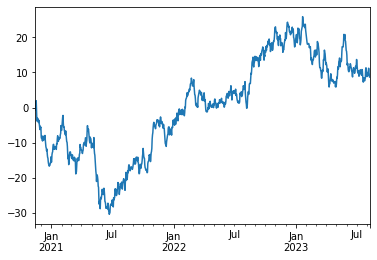

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ts = pd.Series(np.random.randn(1000), index=pd.date_range('11/14/2020', periods=1000))

ts = ts.cumsum() # cumsum() 함수 : 배열에서 주어진 축에 따라 누적되는 원소들의 누적 합을 계산

ts.plot()

plt.show()

<Figure size 432x288 with 0 Axes>

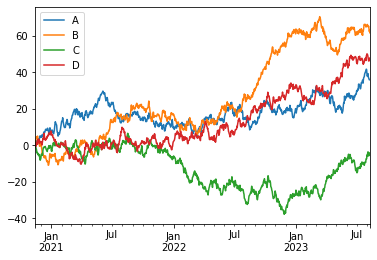

In [ ]:
# 데이터프레임에서 plot()함수는 라벨이 존재하는 모든 열을 그릴 때 편리

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ts = pd.Series(np.random.randn(1000), index=pd.date_range('11/14/2020', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns = ['A', 'B', 'C', 'D'])

df = df.cumsum()

plt.figure()

df.plot()

plt.legend(loc='best')

plt.show()

# 12. Getting Data In / Out (데이터 입 / 출력)

- CSV : csv 파일 쓰기 / 읽기
  - df.to_csv('foo.csv') : 파일 쓰기
  - df.read_csv('foo.csv') : 파일 읽기
- HDF5 : HDFStores에 쓰기 /읽기
  - df.to_hdf('foo.h5','df') : 파일 쓰기
  - df.read_hdf('foo.h5','df') : 파일 읽기
- Excel : MS Excel 파일 쓰기 / 읽기
  - df.to_excel('foo.xlsx', sheet_name='Sheet1') : 파일 쓰기
  - df.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])


# 13. Gotchas (잡았다!)

In [ ]:
if pd.Series([False, True, False]):
  print("I was true")

# 오류 발생

ValueError: ignored

In [ ]:
# 오류 해결 : any(), all(), empty 등을 사용. 
# 무엇을 원하는지를 선택 (반영) 해주어야 함.

if pd.Series([False, True, False]) is not None:
  print("I was not None")

I was not None
